## GET Requests - POST - Scraping



In [ ]:
import requests  # Requests is a Python library that allows you to send HTTP requests easily

url = "https://www.ibm.com/"
r = requests.get(url)  # Send a GET request
r  # 200 means the request was successful

<Response [200]>

In [ ]:
header = r.headers  # Stores in the variable 'header' all the information returned by the server
header  # Displays the content of that variable, which is the server data in dictionary format


{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Mon, 10 Nov 2025 14:39:19 GMT', 'ETag': '"3119b-6433e7f1abeec-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Mon, 10 Nov 2025 14:56:36 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Mon, 10 Nov 2025 14:46:36 GMT', 'Content-Length': '38938', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}

In [ ]:
header["date"] # obtain the date the application was submitted

'Mon, 10 Nov 2025 14:46:36 GMT'

In [ ]:
r.headers["Content-Type"] # data type

'text/html'

In [ ]:
r.encoding # text encoding

'utf-8'

In [ ]:
r.text[0:100] # Shows only the first 100 characters of the content of the web page you downloaded

' \n<!DOCTYPE HTML>\n\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n'

### Query String

In [ ]:
url = "https://httpbin.org/get" # /get
params = {"Name": "Joseph", "ID": "123"}  # parameters to be sent
r = requests.get(url, params=params)
print(r.url)  # shows the full URL with the query string

https://httpbin.org/get?Name=Joseph&ID=123


In [ ]:
url = "https://api.agify.io"  # Public API that predicts age based on a name
# /get is not required here; this API responds directly to GET requests
params = {"name": "Joseph", "country_id": "US"}  # We send the name and the country as parameters
r = requests.get(url, params=params)  # Send the GET request with parameters
print(r.status_code)  # Prints 200 if the request was successful

200


In [ ]:
print(data["name"]) # Shows the name we sent

Joseph


In [ ]:
data = r.json()  # Converts the JSON response to a Python dictionary
data

{'count': 33546, 'name': 'Joseph', 'age': 60, 'country_id': 'US'}

In [ ]:
print(data["age"])  # Shows the estimated age

60


### POST REQUEST

##### GET  = Requests information from the server.
##### POST = Sends information to the server (for example, a form submission).
##### /get and /post are endpoints used by some APIs to specify the type of request they expect.
#####  They are only included when the API documentation states that you must call those routes.
##### Each API defines its own endpoints.


In [77]:
url = "https://jsonplaceholder.typicode.com/posts" 
data = {"title": "Mi título", "body": "Este es el cuerpo", "userId": 1}  # Datos que queremos enviar
r = requests.post(url, json=data)   # Enviamos la solicitud POST con los datos en JSON
print(r.status_code)  #  Muestra 201 si se creó correctamente

201


In [78]:
print(r.json()) # mostramos la respuesta JSON

{'title': 'Mi título', 'body': 'Este es el cuerpo', 'userId': 1, 'id': 101}


### Compare POST and GET

In [ ]:
import requests  # library for making HTTP requests

url_get = "https://httpbin.org/get"       # test URL for GET requests
url_post = "https://httpbin.org/post"     # test URL for POST requests

data = {"name": "Joseph", "ID": "123"}    # data to send

r_get = requests.get(url_get, params=data)       # GET → data goes in the URL (query string)
r_post = requests.post(url_post, data=data)      # POST → data goes in the request body

print("POST request body:", r_post.request.body)  # shows what was sent in the POST body
print("GET request body:", r_get.request.body)    # GET has no body → should be None

print("Status POST:", r_post.status_code)         # expected 200 if successful
print("Content-Type POST:", r_post.headers.get("Content-Type"))  # response content type

# Only attempt JSON parsing if the response is actually JSON
if "application/json" in r_post.headers.get("Content-Type", ""):
    print(r_post.json()["form"])  # shows the data received by the server through POST
else:
    print("The response is not JSON. Raw content:")
    print(r_post.text[:300])      # shows part of the text response



POST request body: name=Joseph&ID=123
GET request body: None
Status POST: 200
Content-Type POST: application/json
{'ID': '123', 'name': 'Joseph'}


### Web Scraping

##### It is a technique to automatically extract information from web pages (for example, names, prices, news, etc.) 
##### You use Python to download the HTML of a website and then read the data that interests you.

In [ ]:
import requests  # Library to make HTTP requests (request the page)
from bs4 import BeautifulSoup # Library to read and analyze HTML


In [ ]:
url = "https://jsonplaceholder.typicode.com/posts"  # URL of the page we want to "read"
response = requests.get(url)  # We make a GET request to download the page
print(response.status_code)  # We check if it went well: 200 = OK

200


In [ ]:
html_content = response.text  # We save the content of the response
# We created the BeautifulSoup object (although this is JSON, it still works to understand it)
soup = BeautifulSoup(html_content, "html.parser")

In [ ]:
# We show the first 500 characters to see what it contains
print(html_content[:500])

[
  {
    "userId": 1,
    "id": 1,
    "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
    "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
  },
  {
    "userId": 1,
    "id": 2,
    "title": "qui est esse",
    "body": "est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate p


## Download images

### Import libraries

In [ ]:
import requests      # To download the image from the Internet
import os           # To handle file paths (folders, names, etc.)
from PIL import Image  # To open and display the downloaded image


### Choose the image URL

In [ ]:
url_img = "https://httpbin.org/image/png" # URL of a test image

### Make the request (download the image)

In [ ]:
response = requests.get(url_img)  # We ask the server to send us the image
print(response.status_code)       # We check if it went well (200 = OK)

200


### Create the file name and path

In [ ]:
path = os.path.join(os.getcwd(), "imagen_descargada.png")  # Path where the image will be saved
print(path)  # Just so you can see where it will be saved

#os.getcwd() → current folder.

#"imagen_descargada.png" → file name.

#os.path.join(...) → joins folder + name → full path.


/Users/danij4ne/python-labs/jupyter-train/imagen_descargada.png


### Save the image to your computer

In [ ]:
with open(path, "wb") as f:    # "wb" = write binary, write in binary
    f.write(response.content)  # We save the image content inside the file


### Open and display the image


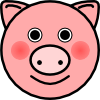

In [ ]:
img = Image.open(path)  # We open the image we just saved
display(img)            # In Jupyter: displays the image in the cell
# img.show()            # Alternative: opens the image in an external window


### View basic information about the image

In [ ]:
print("Formato:", img.format)   # Ex: PNG
print("Tamaño:", img.size)      # Ex: (width, height)
print("Modo color:", img.mode)  # Ex: RGB

Formato: PNG
Tamaño: (100, 100)
Modo color: RGB


## SUMMARY: HTTP y Requests in Python

In [ ]:
# Requests is a library used to send HTTP requests (GET, POST...) to web servers.
import requests
import os
from PIL import Image

# -----------------------------------------------------------------------------
# What is HTTP?
# -----------------------------------------------------------------------------
# HTTP (HyperText Transfer Protocol) allows a client (you) to request resources
# from a server (a website).
# Example: when you visit a website, your browser sends a request and receives a response.
# -----------------------------------------------------------------------------


# -----------------------------------------------------------------------------
# 1. GET Request
# -----------------------------------------------------------------------------
# Used to REQUEST information from a website (does not send a body).
# -----------------------------------------------------------------------------
url = "https://httpbin.org/get"  # Test URL

params = {"name": "Joseph", "ID": "123"}  # Query string parameters

r = requests.get(url, params=params)  # GET request with parameters

print("Status code:", r.status_code)  # 200 = OK
print("Generated URL:", r.url)        # Full URL with added parameters
print("GET request body:", r.request.body)  # None, GET has no body
print("Response content type:", r.headers['Content-Type'])
print("First 100 characters of the HTML:")
print(r.text[:100])  # Shows part of the HTML received


# -----------------------------------------------------------------------------
# 2. POST Request
# -----------------------------------------------------------------------------
# Used to SEND information to the server (the data goes in the body, not in the URL).
# -----------------------------------------------------------------------------
url_post = "https://httpbin.org/post"  # Test URL for POST
payload = {"name": "Joseph", "job": "Developer"}  # Data to send

r_post = requests.post(url_post, data=payload)  # POST request with body data

print("\nPOST - Status code:", r_post.status_code)
print("POST request body:", r_post.request.body)
print("Response body (summary):", r_post.text[:150])


# -----------------------------------------------------------------------------
# 3. Headers and Encoding
# -----------------------------------------------------------------------------
print("\nPOST response headers:")
print(r_post.headers)

print("\nResponse encoding:", r_post.encoding)


# -----------------------------------------------------------------------------
# 4. Download and save a file
# -----------------------------------------------------------------------------
# Example: download an image and save it in the current folder.
url_img = "https://httpbin.org/image/png"

r_img = requests.get(url_img)

path = os.path.join(os.getcwd(), "downloaded_image.png")

with open(path, "wb") as f:  # wb = write binary
    f.write(r_img.content)

img = Image.open(path)
img.show()


# -----------------------------------------------------------------------------
# 5. Quick status code summary
# -----------------------------------------------------------------------------
# 200 -> OK
# 201 -> Created
# 301 -> Moved permanently
# 400 -> Bad request
# 401 -> Unauthorized
# 403 -> Forbidden
# 404 -> Not found
# 500 -> Server error
# -----------------------------------------------------------------------------


# -----------------------------------------------------------------------------
# 6. Difference between GET and POST
# -----------------------------------------------------------------------------
# GET  -> Data goes in the URL (visible)
# POST -> Data goes in the body (hidden)
# -----------------------------------------------------------------------------


# -----------------------------------------------------------------------------
# 7. GET vs POST summary
# -----------------------------------------------------------------------------
print("\nGET vs POST comparison:")
print("GET body:", r.request.body)
print("POST body:", r_post.request.body)
